# About the Dataset: Open University Learning Analytics (OULAD)

This notebook explores the **Open University Learning Analytics Dataset (OULAD)**.

## 1. Overview

The dataset, provided by **The Open University** in the UK, contains information about students, their enrolled courses (called "modules"), and their detailed interactions with the Virtual Learning Environment (VLE).

The data tracks students across seven selected modules. Course presentations are offered starting in either February (marked "B") or October (marked "J").

## 2. Goal for This Project

The primary goal of this analysis is to **identify behavioral patterns that correlate with student outcomes**. Specifically, we aim to build a predictive model that can identify students who are "at-risk" of either **Failing** or **Withdrawing** from a course.

This "at-risk" status will serve as a strong proxy for detecting procrastination patterns, such as:
* Late or "just-in-time" assessment submissions.
* "Cramming" (bursts of VLE activity) versus consistent study habits.
* Early disengagement or late registration.

## 3. Key Data Files

The dataset is spread across several CSV files. Our analysis will primarily focus on merging and analyzing the following:

* `studentInfo.csv`: Contains demographic data for each student and, most importantly, their `final_result` (Pass, Fail, Distinction, Withdrawn).
* `assessments.csv`: Provides the official deadline (`date`) for each assessment.
* `studentAssessment.csv`: Contains the student's actual submission date (`date_submitted`) and their `score`.
* `studentVle.csv`: A detailed log of student interactions (`sum_click`) with VLE materials, tracked by date, which we will use to model study habits.
* `studentRegistration.csv`: Includes the date a student registered (`date_registration`), which can indicate if they started the course late.

## Load Student Info and Define Target

### Subtask:
Load the 'studentInfo.csv' dataset. Create a new binary column named 'is_at_risk' where 1 indicates 'Fail' or 'Withdrawn' in 'final_result', and 0 indicates 'Pass' or 'Distinction'.


**Method**:
The first instruction is to load the 'studentInfo.csv' file into a pandas DataFrame named `df_students`.



In [5]:
import pandas as pd

df_students = pd.read_csv('/content/studentInfo.csv')
print("DataFrame 'df_students' loaded successfully.")
df_students.head()

DataFrame 'df_students' loaded successfully.


,code_module,code_presentation,id_student,gender,region,highest_education,imd_band,age_band,num_of_prev_attempts,studied_credits,disability,final_result
0,AAA,2013J,11391,M,East Anglian Region,HE Qualification,90-100%,55<=,0,240,N,Pass
1,AAA,2013J,28400,F,Scotland,HE Qualification,20-30%,35-55,0,60,N,Pass
2,AAA,2013J,30268,F,North Western Region,A Level or Equivalent,30-40%,35-55,0,60,Y,Withdrawn
3,AAA,2013J,31604,F,South East Region,A Level or Equivalent,50-60%,35-55,0,60,N,Pass
4,AAA,2013J,32885,F,West Midlands Region,Lower Than A Level,50-60%,0-35,0,60,N,Pass


**Method**:
Now that 'df_students' is loaded, I will create the 'is_at_risk' column based on the 'final_result' column as specified in the subtask.



In [6]:
df_students['is_at_risk'] = df_students['final_result'].apply(lambda x: 1 if x in ['Fail', 'Withdrawn'] else 0)
print("'is_at_risk' column created successfully.")
df_students.head()

'is_at_risk' column created successfully.


,code_module,code_presentation,id_student,gender,region,highest_education,imd_band,age_band,num_of_prev_attempts,studied_credits,disability,final_result,is_at_risk
0,AAA,2013J,11391,M,East Anglian Region,HE Qualification,90-100%,55<=,0,240,N,Pass,0
1,AAA,2013J,28400,F,Scotland,HE Qualification,20-30%,35-55,0,60,N,Pass,0
2,AAA,2013J,30268,F,North Western Region,A Level or Equivalent,30-40%,35-55,0,60,Y,Withdrawn,1
3,AAA,2013J,31604,F,South East Region,A Level or Equivalent,50-60%,35-55,0,60,N,Pass,0
4,AAA,2013J,32885,F,West Midlands Region,Lower Than A Level,50-60%,0-35,0,60,N,Pass,0


## Merge Registration Data

### Subtask:
Load 'studentRegistration.csv' and merge it with the 'studentInfo' DataFrame using 'id_student', 'code_module', and 'code_presentation' as keys.


**Method**:
The subtask requires loading 'studentRegistration.csv' and merging it with 'df_students'. First, I will load the 'studentRegistration.csv' file into a new DataFrame named `df_registration`.



In [7]:
df_registration = pd.read_csv('/content/studentRegistration.csv')
print("DataFrame 'df_registration' loaded successfully.")
df_registration.head()

DataFrame 'df_registration' loaded successfully.


,code_module,code_presentation,id_student,date_registration,date_unregistration
0,AAA,2013J,11391,-159,?
1,AAA,2013J,28400,-53,?
2,AAA,2013J,30268,-92,12
3,AAA,2013J,31604,-52,?
4,AAA,2013J,32885,-176,?


**Method**:
Now that 'df_registration' is loaded, I will merge it with 'df_students' using 'id_student', 'code_module', and 'code_presentation' as common keys, as specified in the subtask.



In [8]:
df_students = pd.merge(df_students, df_registration, on=['id_student', 'code_module', 'code_presentation'], how='left')
print("'df_students' and 'df_registration' merged successfully.")
df_students.head()

'df_students' and 'df_registration' merged successfully.


,code_module,code_presentation,id_student,gender,region,highest_education,imd_band,age_band,num_of_prev_attempts,studied_credits,disability,final_result,is_at_risk,date_registration,date_unregistration
0,AAA,2013J,11391,M,East Anglian Region,HE Qualification,90-100%,55<=,0,240,N,Pass,0,-159,?
1,AAA,2013J,28400,F,Scotland,HE Qualification,20-30%,35-55,0,60,N,Pass,0,-53,?
2,AAA,2013J,30268,F,North Western Region,A Level or Equivalent,30-40%,35-55,0,60,Y,Withdrawn,1,-92,12
3,AAA,2013J,31604,F,South East Region,A Level or Equivalent,50-60%,35-55,0,60,N,Pass,0,-52,?
4,AAA,2013J,32885,F,West Midlands Region,Lower Than A Level,50-60%,0-35,0,60,N,Pass,0,-176,?


# Task
Load the 'studentAssessment.csv' dataset into a new DataFrame named `df_assessments` and then merge the `df_assessments` DataFrame with the `df_students` DataFrame using 'id_student', 'code_module', and 'code_presentation' as keys.

## Load Student Assessment Data

### Subtask:
Load the 'studentAssessment.csv' dataset into a new DataFrame named `df_assessments`.


**Method**:
The first instruction is to load the 'studentAssessment.csv' file into a pandas DataFrame named `df_assessments`.



In [9]:
df_assessments = pd.read_csv('/content/studentAssessment.csv')
print("DataFrame 'df_assessments' loaded successfully.")
df_assessments.head()

DataFrame 'df_assessments' loaded successfully.


,id_assessment,id_student,date_submitted,is_banked,score
0,1752,11391,18,0,78
1,1752,28400,22,0,70
2,1752,31604,17,0,72
3,1752,32885,26,0,69
4,1752,38053,19,0,79


## Merge Student Assessment Data

### Subtask:
Merge the `df_assessments` DataFrame with the `df_students` DataFrame using 'id_student', 'code_module', and 'code_presentation' as keys. This merge will result in multiple rows per student, as each student can have multiple assessments.


## Summary:

### Data Analysis Key Findings
*   The `studentAssessment.csv` dataset was successfully loaded into a pandas DataFrame named `df_assessments`.
*   The `df_assessments` DataFrame contains columns such as `id_assessment`, `id_student`, `date_submitted`, `is_banked`, and `score`.

### Insights or Next Steps
*   The next step is to proceed with merging the `df_assessments` DataFrame with the `df_students` DataFrame using the specified keys, as outlined in the initial task description.


# Task
To properly merge assessment data, it's necessary to first load `assessments.csv` because `df_assessments` (from `studentAssessment.csv`) does not contain the `code_module` and `code_presentation` columns needed for the subsequent merge with `df_students`.

Here's the corrected plan to achieve the "Merge Assessment Data" goal:

### Subtask:
1.  Load 'assessments.csv' into a new DataFrame.
2.  Merge `df_assessments` (which currently holds student assessment scores) with the newly loaded `assessments` DataFrame using 'id_assessment' as the key.
3.  Merge the resulting DataFrame (containing student scores, assessment details, module, and presentation info) with `df_students` using 'id_student', 'code_module', and 'code_presentation' as keys. This will result in multiple rows per student, as each student can have multiple assessments.

## Merge Assessment Data

### Subtask:
Load 'assessments.csv' into a new DataFrame.


**Method**:
The subtask explicitly asks to load 'assessments.csv' into a DataFrame named `df_assessments_details`. I will use `pd.read_csv` to accomplish this.



In [10]:
df_assessments_details = pd.read_csv('/content/assessments.csv')
print("DataFrame 'df_assessments_details' loaded successfully.")
df_assessments_details.head()

DataFrame 'df_assessments_details' loaded successfully.


,code_module,code_presentation,id_assessment,assessment_type,date,weight
0,AAA,2013J,1752,TMA,19,10.0
1,AAA,2013J,1753,TMA,54,20.0
2,AAA,2013J,1754,TMA,117,20.0
3,AAA,2013J,1755,TMA,166,20.0
4,AAA,2013J,1756,TMA,215,30.0


## Merge Student Assessments with Assessment Details

### Subtask:
Merge `df_assessments` (student scores) with `df_assessments_details` (assessment metadata) using 'id_assessment' as the key.

**Method**:
Now that 'df_assessments_details' and 'df_assessments' are both loaded, I will merge them using 'id_assessment' to enrich the student assessment scores with assessment details like 'code_module' and 'code_presentation'.



In [11]:
df_assessments = pd.merge(df_assessments, df_assessments_details, on='id_assessment', how='left')
print("df_assessments merged with df_assessments_details successfully.")
df_assessments.head()

df_assessments merged with df_assessments_details successfully.


,id_assessment,id_student,date_submitted,is_banked,score,code_module,code_presentation,assessment_type,date,weight
0,1752,11391,18,0,78,AAA,2013J,TMA,19,10.0
1,1752,28400,22,0,70,AAA,2013J,TMA,19,10.0
2,1752,31604,17,0,72,AAA,2013J,TMA,19,10.0
3,1752,32885,26,0,69,AAA,2013J,TMA,19,10.0
4,1752,38053,19,0,79,AAA,2013J,TMA,19,10.0


**Method**:
Now that `df_assessments` contains both student scores and assessment details including 'code_module' and 'code_presentation', I will merge it with `df_students` using 'id_student', 'code_module', and 'code_presentation' as common keys, as specified in the subtask.



In [12]:
df_students = pd.merge(df_students, df_assessments, on=['id_student', 'code_module', 'code_presentation'], how='left')
print("'df_students' merged with assessment data successfully.")
df_students.head()

'df_students' merged with assessment data successfully.


,code_module,code_presentation,id_student,gender,region,highest_education,imd_band,age_band,num_of_prev_attempts,studied_credits,...,is_at_risk,date_registration,date_unregistration,id_assessment,date_submitted,is_banked,score,assessment_type,date,weight
0,AAA,2013J,11391,M,East Anglian Region,HE Qualification,90-100%,55<=,0,240,...,0,-159,?,1752.0,18.0,0.0,78,TMA,19,10.0
1,AAA,2013J,11391,M,East Anglian Region,HE Qualification,90-100%,55<=,0,240,...,0,-159,?,1753.0,53.0,0.0,85,TMA,54,20.0
2,AAA,2013J,11391,M,East Anglian Region,HE Qualification,90-100%,55<=,0,240,...,0,-159,?,1754.0,115.0,0.0,80,TMA,117,20.0
3,AAA,2013J,11391,M,East Anglian Region,HE Qualification,90-100%,55<=,0,240,...,0,-159,?,1755.0,164.0,0.0,85,TMA,166,20.0
4,AAA,2013J,11391,M,East Anglian Region,HE Qualification,90-100%,55<=,0,240,...,0,-159,?,1756.0,212.0,0.0,82,TMA,215,30.0


## Perform Memory-Efficient Feature Engineering

### Subtask:
Re-initialize the main student DataFrame, calculate aggregated assessment and VLE features, and merge them efficiently.


**Method**:
The first step of the subtask is to re-initialize `df_students` by loading `studentInfo.csv`, creating the `is_at_risk` column, and then merging it with `df_registration`. This ensures a clean base for further feature engineering.



In [18]:
df_students = pd.read_csv('/content/studentInfo.csv')
df_students['is_at_risk'] = df_students['final_result'].apply(lambda x: 1 if x in ['Fail', 'Withdrawn'] else 0)
df_students = pd.merge(df_students, df_registration, on=['id_student', 'code_module', 'code_presentation'], how='left')
print("df_students re-initialized and merged with df_registration successfully.")
df_students.head()

df_students re-initialized and merged with df_registration successfully.


,code_module,code_presentation,id_student,gender,region,highest_education,imd_band,age_band,num_of_prev_attempts,studied_credits,disability,final_result,is_at_risk,date_registration,date_unregistration
0,AAA,2013J,11391,M,East Anglian Region,HE Qualification,90-100%,55<=,0,240,N,Pass,0,-159,?
1,AAA,2013J,28400,F,Scotland,HE Qualification,20-30%,35-55,0,60,N,Pass,0,-53,?
2,AAA,2013J,30268,F,North Western Region,A Level or Equivalent,30-40%,35-55,0,60,Y,Withdrawn,1,-92,12
3,AAA,2013J,31604,F,South East Region,A Level or Equivalent,50-60%,35-55,0,60,N,Pass,0,-52,?
4,AAA,2013J,32885,F,West Midlands Region,Lower Than A Level,50-60%,0-35,0,60,N,Pass,0,-176,?


# Task
To aggregate assessment features, I will calculate the difference between `date_submitted` and `date` to determine `days_late` and `days_early` for each assessment. Then, I will group the `df_assessments` DataFrame by `id_student`, `code_module`, and `code_presentation` and compute the `mean_score`, `total_submitted_assessments`, `avg_days_late`, and `avg_days_early` for each group.

```python
# Calculate the difference between submission date and due date
df_assessments['days_diff'] = df_assessments['date_submitted'] - df_assessments['date']

# Calculate days late (positive difference)
df_assessments['days_late'] = df_assessments['days_diff'].apply(lambda x: x if x > 0 else 0)

# Calculate days early (negative difference, made positive for early days)
df_assessments['days_early'] = df_assessments['days_diff'].apply(lambda x: -x if x < 0 else 0)

# Aggregate assessment features
aggregated_assessments = df_assessments.groupby(['id_student', 'code_module', 'code_presentation']).agg(
    mean_score=('score', 'mean'),
    total_submitted_assessments=('id_assessment', 'count'),
    # Calculate the mean of only the positive 'days_late' values. If none, result is NaN.
    avg_days_late=('days_late', lambda x: x[x > 0].mean()),
    # Calculate the mean of only the positive 'days_early' values. If none, result is NaN.
    avg_days_early=('days_early', lambda x: x[x > 0].mean())
).reset_index()

print("Aggregated assessment features created successfully:")
print(aggregated_assessments.head())

# Drop the temporary columns from df_assessments to save memory
df_assessments = df_assessments.drop(columns=['days_diff', 'days_late', 'days_early'])
```

## Aggregate Assessment Features

### Subtask:
Aggregate the 'df_assessments' DataFrame to calculate features like `mean_score`, `total_submitted_assessments`, `avg_days_late`, and `avg_days_early` for each student, module, and presentation combination.


**Method**:
The first instruction is to calculate the difference between 'date_submitted' and 'date' in the `df_assessments` DataFrame and store it in a new column named 'days_diff'.



In [21]:
df_assessments['days_diff'] = df_assessments['date_submitted'] - df_assessments['date']
print("'days_diff' column created successfully.")
df_assessments.head()

'days_diff' column created successfully.


,id_assessment,id_student,date_submitted,is_banked,score,code_module,code_presentation,assessment_type,date,weight,days_to_submit,days_diff
0,1752,11391,18,0,78.0,AAA,2013J,TMA,19.0,10.0,-1.0,-1.0
1,1752,28400,22,0,70.0,AAA,2013J,TMA,19.0,10.0,3.0,3.0
2,1752,31604,17,0,72.0,AAA,2013J,TMA,19.0,10.0,-2.0,-2.0
3,1752,32885,26,0,69.0,AAA,2013J,TMA,19.0,10.0,7.0,7.0
4,1752,38053,19,0,79.0,AAA,2013J,TMA,19.0,10.0,0.0,0.0


**Method**:
The next step is to create a new column 'days_late' in `df_assessments` where values are 'days_diff' if 'days_diff' is positive, otherwise 0.



In [22]:
df_assessments['days_late'] = df_assessments['days_diff'].apply(lambda x: x if x > 0 else 0)
print("'days_late' column created successfully.")
df_assessments.head()

'days_late' column created successfully.


,id_assessment,id_student,date_submitted,is_banked,score,code_module,code_presentation,assessment_type,date,weight,days_to_submit,days_diff,days_late
0,1752,11391,18,0,78.0,AAA,2013J,TMA,19.0,10.0,-1.0,-1.0,0.0
1,1752,28400,22,0,70.0,AAA,2013J,TMA,19.0,10.0,3.0,3.0,3.0
2,1752,31604,17,0,72.0,AAA,2013J,TMA,19.0,10.0,-2.0,-2.0,0.0
3,1752,32885,26,0,69.0,AAA,2013J,TMA,19.0,10.0,7.0,7.0,7.0
4,1752,38053,19,0,79.0,AAA,2013J,TMA,19.0,10.0,0.0,0.0,0.0


**Method**:
The next step is to create a new column 'days_early' in `df_assessments` where values are the absolute value of 'days_diff' if 'days_diff' is negative, otherwise 0.



In [23]:
df_assessments['days_early'] = df_assessments['days_diff'].apply(lambda x: -x if x < 0 else 0)
print("'days_early' column created successfully.")
df_assessments.head()

'days_early' column created successfully.


,id_assessment,id_student,date_submitted,is_banked,score,code_module,code_presentation,assessment_type,date,weight,days_to_submit,days_diff,days_late,days_early
0,1752,11391,18,0,78.0,AAA,2013J,TMA,19.0,10.0,-1.0,-1.0,0.0,1.0
1,1752,28400,22,0,70.0,AAA,2013J,TMA,19.0,10.0,3.0,3.0,3.0,0.0
2,1752,31604,17,0,72.0,AAA,2013J,TMA,19.0,10.0,-2.0,-2.0,0.0,2.0
3,1752,32885,26,0,69.0,AAA,2013J,TMA,19.0,10.0,7.0,7.0,7.0,0.0
4,1752,38053,19,0,79.0,AAA,2013J,TMA,19.0,10.0,0.0,0.0,0.0,0.0


**Method**:
Now that 'days_diff', 'days_late', and 'days_early' columns are created, the next step is to group `df_assessments` by 'id_student', 'code_module', and 'code_presentation' and calculate the specified aggregated features: 'mean_score', 'total_submitted_assessments', 'avg_days_late', and 'avg_days_early'. The result will be stored in a new DataFrame called `aggregated_assessments` with its index reset, and then its head will be printed.



In [24]:
aggregated_assessments = df_assessments.groupby(['id_student', 'code_module', 'code_presentation']).agg(
    mean_score=('score', 'mean'),
    total_submitted_assessments=('id_assessment', 'count'),
    avg_days_late=('days_late', lambda x: x[x > 0].mean()),
    avg_days_early=('days_early', lambda x: x[x > 0].mean())
).reset_index()

print("Aggregated assessment features created successfully:")
print(aggregated_assessments.head())

Aggregated assessment features created successfully:
   id_student code_module code_presentation  mean_score  \
0        6516         AAA             2014J   61.800000   
1        8462         DDD             2013J   87.666667   
2        8462         DDD             2014J   86.500000   
3       11391         AAA             2013J   82.000000   
4       23629         BBB             2013B   82.500000   

   total_submitted_assessments  avg_days_late  avg_days_early  
0                            5            NaN             2.6  
1                            3            4.0             2.5  
2                            4            NaN            59.5  
3                            5            NaN             1.8  
4                            4            8.0            10.0  


**Method**:
The final instruction of the subtask is to drop the temporary columns 'days_diff', 'days_late', and 'days_early' from `df_assessments` to optimize memory usage. This completes the subtask of aggregating assessment features.



In [25]:
df_assessments = df_assessments.drop(columns=['days_diff', 'days_late', 'days_early'])
print("Temporary columns 'days_diff', 'days_late', and 'days_early' dropped from df_assessments.")
df_assessments.head()

Temporary columns 'days_diff', 'days_late', and 'days_early' dropped from df_assessments.


,id_assessment,id_student,date_submitted,is_banked,score,code_module,code_presentation,assessment_type,date,weight,days_to_submit
0,1752,11391,18,0,78.0,AAA,2013J,TMA,19.0,10.0,-1.0
1,1752,28400,22,0,70.0,AAA,2013J,TMA,19.0,10.0,3.0
2,1752,31604,17,0,72.0,AAA,2013J,TMA,19.0,10.0,-2.0
3,1752,32885,26,0,69.0,AAA,2013J,TMA,19.0,10.0,7.0
4,1752,38053,19,0,79.0,AAA,2013J,TMA,19.0,10.0,0.0


## Merge Aggregated Assessment Features

### Subtask:
Merge the newly created aggregated assessment features into the main 'df_students' DataFrame using 'id_student', 'code_module', and 'code_presentation' as keys.


**Method**:
I will merge the 'aggregated_assessments' DataFrame into 'df_students' using a left merge on the specified common keys, then display the head of the updated 'df_students' DataFrame to verify the new features are included.



In [26]:
df_students = pd.merge(df_students, aggregated_assessments, on=['id_student', 'code_module', 'code_presentation'], how='left')
print("'df_students' merged with aggregated assessment features successfully.")
df_students.head()

'df_students' merged with aggregated assessment features successfully.


,code_module,code_presentation,id_student,gender,region,highest_education,imd_band,age_band,num_of_prev_attempts,studied_credits,disability,final_result,is_at_risk,date_registration,date_unregistration,mean_score,total_submitted_assessments,avg_days_late,avg_days_early
0,AAA,2013J,11391,M,East Anglian Region,HE Qualification,90-100%,55<=,0,240,N,Pass,0,-159,?,82.0,5.0,NaN,1.800000
1,AAA,2013J,28400,F,Scotland,HE Qualification,20-30%,35-55,0,60,N,Pass,0,-53,?,66.4,5.0,3.5,2.333333
2,AAA,2013J,30268,F,North Western Region,A Level or Equivalent,30-40%,35-55,0,60,Y,Withdrawn,1,-92,12,NaN,NaN,NaN,NaN
3,AAA,2013J,31604,F,South East Region,A Level or Equivalent,50-60%,35-55,0,60,N,Pass,0,-52,?,76.0,5.0,NaN,2.000000
4,AAA,2013J,32885,F,West Midlands Region,Lower Than A Level,50-60%,0-35,0,60,N,Pass,0,-176,?,54.4,5.0,11.4,NaN


## Calculate Procrastination Feature

### Subtask:
Calculate a procrastination score or feature by comparing `date_submitted` with the assessment `date` (deadline) for each assessment. This will be an intermediate step for creating an aggregated procrastination feature.


**Method**:
The subtask requires creating a new binary column 'is_late_submission' in `df_assessments` based on whether 'days_to_submit' is greater than 0. I will apply a lambda function to the 'days_to_submit' column to achieve this.



In [27]:
df_assessments['is_late_submission'] = df_assessments['days_to_submit'].apply(lambda x: 1 if x > 0 else 0)
print("'is_late_submission' column created successfully.")
df_assessments.head()

'is_late_submission' column created successfully.


,id_assessment,id_student,date_submitted,is_banked,score,code_module,code_presentation,assessment_type,date,weight,days_to_submit,is_late_submission
0,1752,11391,18,0,78.0,AAA,2013J,TMA,19.0,10.0,-1.0,0
1,1752,28400,22,0,70.0,AAA,2013J,TMA,19.0,10.0,3.0,1
2,1752,31604,17,0,72.0,AAA,2013J,TMA,19.0,10.0,-2.0,0
3,1752,32885,26,0,69.0,AAA,2013J,TMA,19.0,10.0,7.0,1
4,1752,38053,19,0,79.0,AAA,2013J,TMA,19.0,10.0,0.0,0


**Method**:
Now that 'is_late_submission' has been calculated for each assessment, I need to aggregate this into a procrastination feature per student, module, and presentation. I will group `df_assessments` and calculate the sum of 'is_late_submission' to get the total number of late submissions for each student in each course offering.



In [28]:
procrastination_features = df_assessments.groupby(['id_student', 'code_module', 'code_presentation']).agg(
    total_late_submissions=('is_late_submission', 'sum')
).reset_index()

print("Procrastination features (total_late_submissions) created successfully:")
print(procrastination_features.head())

Procrastination features (total_late_submissions) created successfully:
   id_student code_module code_presentation  total_late_submissions
0        6516         AAA             2014J                       0
1        8462         DDD             2013J                       1
2        8462         DDD             2014J                       0
3       11391         AAA             2013J                       0
4       23629         BBB             2013B                       3


**Method**:
Now that 'procrastination_features' has been created, I will merge this DataFrame with the main 'df_students' DataFrame using 'id_student', 'code_module', and 'code_presentation' as common keys to incorporate these new features.



In [29]:
df_students = pd.merge(df_students, procrastination_features, on=['id_student', 'code_module', 'code_presentation'], how='left')
print("'df_students' merged with procrastination features successfully.")
df_students.head()

'df_students' merged with procrastination features successfully.


,code_module,code_presentation,id_student,gender,region,highest_education,imd_band,age_band,num_of_prev_attempts,studied_credits,disability,final_result,is_at_risk,date_registration,date_unregistration,mean_score,total_submitted_assessments,avg_days_late,avg_days_early,total_late_submissions
0,AAA,2013J,11391,M,East Anglian Region,HE Qualification,90-100%,55<=,0,240,N,Pass,0,-159,?,82.0,5.0,NaN,1.800000,0.0
1,AAA,2013J,28400,F,Scotland,HE Qualification,20-30%,35-55,0,60,N,Pass,0,-53,?,66.4,5.0,3.5,2.333333,2.0
2,AAA,2013J,30268,F,North Western Region,A Level or Equivalent,30-40%,35-55,0,60,Y,Withdrawn,1,-92,12,NaN,NaN,NaN,NaN,NaN
3,AAA,2013J,31604,F,South East Region,A Level or Equivalent,50-60%,35-55,0,60,N,Pass,0,-52,?,76.0,5.0,NaN,2.000000,0.0
4,AAA,2013J,32885,F,West Midlands Region,Lower Than A Level,50-60%,0-35,0,60,N,Pass,0,-176,?,54.4,5.0,11.4,NaN,5.0


## Load VLE Data

### Subtask:
Load the 'studentVle.csv' dataset into a new DataFrame named `df_vle`.


**Method**:
The subtask explicitly asks to load 'studentVle.csv' into a DataFrame named `df_vle`. I will use `pd.read_csv` to accomplish this.



In [30]:
df_vle = pd.read_csv('/content/studentVle.csv')
print("DataFrame 'df_vle' loaded successfully.")
df_vle.head()

DataFrame 'df_vle' loaded successfully.


,code_module,code_presentation,id_student,id_site,date,sum_click
0,AAA,2013J,28400,546652,-10.0,4.0
1,AAA,2013J,28400,546652,-10.0,1.0
2,AAA,2013J,28400,546652,-10.0,1.0
3,AAA,2013J,28400,546614,-10.0,11.0
4,AAA,2013J,28400,546714,-10.0,1.0


## Aggregate VLE Clicks

### Subtask:
Aggregate the `df_vle` DataFrame to calculate features like total number of clicks or average daily clicks per student for each module and presentation combination.


**Method**:
I will group the 'df_vle' DataFrame by 'id_student', 'code_module', and 'code_presentation', then calculate the sum of 'sum_click' and the count of 'date' to create 'total_vle_clicks' and 'num_vle_interactions' respectively. Finally, I will reset the index and store the result in 'aggregated_vle_features' to prepare for merging.



In [31]:
aggregated_vle_features = df_vle.groupby(['id_student', 'code_module', 'code_presentation']).agg(
    total_vle_clicks=('sum_click', 'sum'),
    num_vle_interactions=('date', 'count')
).reset_index()

print("Aggregated VLE features created successfully:")
print(aggregated_vle_features.head())

Aggregated VLE features created successfully:
   id_student code_module code_presentation  total_vle_clicks  \
0        6516         AAA             2014J            2791.0   
1        8462         DDD             2013J             646.0   
2        8462         DDD             2014J              10.0   
3       11391         AAA             2013J             934.0   
4       23629         BBB             2013B             161.0   

   num_vle_interactions  
0                   662  
1                   300  
2                     4  
3                   196  
4                    59  


**Method**:
The previous step successfully aggregated VLE features into `aggregated_vle_features`. The next logical step is to merge this new DataFrame into the main `df_students` DataFrame using 'id_student', 'code_module', and 'code_presentation' as common keys, to incorporate these features for further analysis.



In [32]:
df_students = pd.merge(df_students, aggregated_vle_features, on=['id_student', 'code_module', 'code_presentation'], how='left')
print("'df_students' merged with aggregated VLE features successfully.")
df_students.head()

'df_students' merged with aggregated VLE features successfully.


,code_module,code_presentation,id_student,gender,region,highest_education,imd_band,age_band,num_of_prev_attempts,studied_credits,...,is_at_risk,date_registration,date_unregistration,mean_score,total_submitted_assessments,avg_days_late,avg_days_early,total_late_submissions,total_vle_clicks,num_vle_interactions
0,AAA,2013J,11391,M,East Anglian Region,HE Qualification,90-100%,55<=,0,240,...,0,-159,?,82.0,5.0,NaN,1.800000,0.0,934.0,196.0
1,AAA,2013J,28400,F,Scotland,HE Qualification,20-30%,35-55,0,60,...,0,-53,?,66.4,5.0,3.5,2.333333,2.0,1435.0,430.0
2,AAA,2013J,30268,F,North Western Region,A Level or Equivalent,30-40%,35-55,0,60,...,1,-92,12,NaN,NaN,NaN,NaN,NaN,281.0,76.0
3,AAA,2013J,31604,F,South East Region,A Level or Equivalent,50-60%,35-55,0,60,...,0,-52,?,76.0,5.0,NaN,2.000000,0.0,2158.0,663.0
4,AAA,2013J,32885,F,West Midlands Region,Lower Than A Level,50-60%,0-35,0,60,...,0,-176,?,54.4,5.0,11.4,NaN,5.0,1034.0,352.0


## Handle Missing Values and Encode Categorical Features

### Subtask:
Address any remaining missing values in the 'df_students' DataFrame and encode categorical features using appropriate techniques (e.g., one-hot encoding).


**Method**:
The first instruction is to replace '?' values in the 'date_unregistration' column with `pd.NA`, then convert the column to a numeric type (float), and finally fill any resulting `NaN` values with 0. This prepares the column for numerical operations.



In [33]:
import numpy as np

df_students['date_unregistration'] = df_students['date_unregistration'].replace('?', np.nan).astype(float)
df_students['date_unregistration'] = df_students['date_unregistration'].fillna(0)
print("'date_unregistration' column processed for missing values and converted to numeric.")
df_students.head()

'date_unregistration' column processed for missing values and converted to numeric.


,code_module,code_presentation,id_student,gender,region,highest_education,imd_band,age_band,num_of_prev_attempts,studied_credits,...,is_at_risk,date_registration,date_unregistration,mean_score,total_submitted_assessments,avg_days_late,avg_days_early,total_late_submissions,total_vle_clicks,num_vle_interactions
0,AAA,2013J,11391,M,East Anglian Region,HE Qualification,90-100%,55<=,0,240,...,0,-159,0.0,82.0,5.0,NaN,1.800000,0.0,934.0,196.0
1,AAA,2013J,28400,F,Scotland,HE Qualification,20-30%,35-55,0,60,...,0,-53,0.0,66.4,5.0,3.5,2.333333,2.0,1435.0,430.0
2,AAA,2013J,30268,F,North Western Region,A Level or Equivalent,30-40%,35-55,0,60,...,1,-92,12.0,NaN,NaN,NaN,NaN,NaN,281.0,76.0
3,AAA,2013J,31604,F,South East Region,A Level or Equivalent,50-60%,35-55,0,60,...,0,-52,0.0,76.0,5.0,NaN,2.000000,0.0,2158.0,663.0
4,AAA,2013J,32885,F,West Midlands Region,Lower Than A Level,50-60%,0-35,0,60,...,0,-176,0.0,54.4,5.0,11.4,NaN,5.0,1034.0,352.0


**Method**:
The next step is to fill NaN values in the specified numerical columns ('mean_score', 'total_submitted_assessments', 'avg_days_late', 'avg_days_early', 'total_late_submissions', 'total_vle_clicks', and 'num_vle_interactions') with 0, as instructed.



In [34]:
numerical_cols_to_fill = ['mean_score', 'total_submitted_assessments', 'avg_days_late', 'avg_days_early', 'total_late_submissions', 'total_vle_clicks', 'num_vle_interactions']
df_students[numerical_cols_to_fill] = df_students[numerical_cols_to_fill].fillna(0)
print("NaN values in specified numerical columns filled with 0.")
df_students.head()

NaN values in specified numerical columns filled with 0.


,code_module,code_presentation,id_student,gender,region,highest_education,imd_band,age_band,num_of_prev_attempts,studied_credits,...,is_at_risk,date_registration,date_unregistration,mean_score,total_submitted_assessments,avg_days_late,avg_days_early,total_late_submissions,total_vle_clicks,num_vle_interactions
0,AAA,2013J,11391,M,East Anglian Region,HE Qualification,90-100%,55<=,0,240,...,0,-159,0.0,82.0,5.0,0.0,1.800000,0.0,934.0,196.0
1,AAA,2013J,28400,F,Scotland,HE Qualification,20-30%,35-55,0,60,...,0,-53,0.0,66.4,5.0,3.5,2.333333,2.0,1435.0,430.0
2,AAA,2013J,30268,F,North Western Region,A Level or Equivalent,30-40%,35-55,0,60,...,1,-92,12.0,0.0,0.0,0.0,0.000000,0.0,281.0,76.0
3,AAA,2013J,31604,F,South East Region,A Level or Equivalent,50-60%,35-55,0,60,...,0,-52,0.0,76.0,5.0,0.0,2.000000,0.0,2158.0,663.0
4,AAA,2013J,32885,F,West Midlands Region,Lower Than A Level,50-60%,0-35,0,60,...,0,-176,0.0,54.4,5.0,11.4,0.000000,5.0,1034.0,352.0


**Method**:
The next step is to identify categorical columns in 'df_students' and apply one-hot encoding to convert them into numerical representations, as specified in the subtask. After encoding, the original categorical columns will be dropped.



In [35]:
categorical_cols = ['code_module', 'code_presentation', 'gender', 'region', 'highest_education', 'imd_band', 'age_band', 'disability']
df_students = pd.get_dummies(df_students, columns=categorical_cols, drop_first=True)
print("Categorical columns one-hot encoded and original columns dropped.")
df_students.head()

Categorical columns one-hot encoded and original columns dropped.


,id_student,num_of_prev_attempts,studied_credits,final_result,is_at_risk,date_registration,date_unregistration,mean_score,total_submitted_assessments,avg_days_late,...,imd_band_40-50%,imd_band_50-60%,imd_band_60-70%,imd_band_70-80%,imd_band_80-90%,imd_band_90-100%,imd_band_?,age_band_35-55,age_band_55<=,disability_Y
0,11391,0,240,Pass,0,-159,0.0,82.0,5.0,0.0,...,False,False,False,False,False,True,False,False,True,False
1,28400,0,60,Pass,0,-53,0.0,66.4,5.0,3.5,...,False,False,False,False,False,False,False,True,False,False
2,30268,0,60,Withdrawn,1,-92,12.0,0.0,0.0,0.0,...,False,False,False,False,False,False,False,True,False,True
3,31604,0,60,Pass,0,-52,0.0,76.0,5.0,0.0,...,False,True,False,False,False,False,False,True,False,False
4,32885,0,60,Pass,0,-176,0.0,54.4,5.0,11.4,...,False,True,False,False,False,False,False,False,False,False


## Split Data

### Subtask:
Split the preprocessed 'df_students' DataFrame into training and testing sets, separating features (X) and the target variable ('is_at_risk', y).


**Method**:
The first step is to separate the feature matrix (X) from the target vector (y). The target variable 'is_at_risk' will be assigned to 'y', and all other relevant columns, excluding 'final_result', will be assigned to 'X'.



In [36]:
from sklearn.model_selection import train_test_split

X = df_students.drop(columns=['is_at_risk', 'final_result'])
y = df_students['is_at_risk']

print("Features (X) and target (y) separated successfully.")
print(f"Shape of X: {X.shape}")
print(f"Shape of y: {y.shape}")

Features (X) and target (y) separated successfully.
Shape of X: (32593, 51)
Shape of y: (32593,)


**Method**:
The next step is to split the dataset into training and testing sets with an 80/20 ratio, stratifying by the target variable 'y' to maintain class distribution, and setting a random state for reproducibility as per the subtask instructions.



In [37]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, stratify=y, random_state=42)

print("Dataset split into training and testing sets successfully.")
print(f"Shape of X_train: {X_train.shape}")
print(f"Shape of X_test: {X_test.shape}")
print(f"Shape of y_train: {y_train.shape}")
print(f"Shape of y_test: {y_test.shape}")

Dataset split into training and testing sets successfully.
Shape of X_train: (26074, 51)
Shape of X_test: (6519, 51)
Shape of y_train: (26074,)
Shape of y_test: (6519,)


## Scale Features

### Subtask:
Apply feature scaling (e.g., StandardScaler) to numerical features in both the training and testing sets to ensure optimal model performance.


**Method**:
The first step is to import the StandardScaler from sklearn.preprocessing, as instructed in the subtask.



In [38]:
from sklearn.preprocessing import StandardScaler

print("StandardScaler imported successfully.")

StandardScaler imported successfully.


**Method**:
Now that StandardScaler is imported, the next step is to instantiate a StandardScaler object, as per the subtask instructions.



In [39]:
scaler = StandardScaler()
print("StandardScaler object instantiated successfully.")

StandardScaler object instantiated successfully.


**Method**:
The next step is to fit the `StandardScaler` object to the training features `X_train` to learn the scaling parameters, as specified in the subtask.



In [41]:
X_train['date_registration'] = X_train['date_registration'].replace('?', np.nan).astype(float).fillna(0)
X_test['date_registration'] = X_test['date_registration'].replace('?', np.nan).astype(float).fillna(0)

scaler.fit(X_train)
print("Scaler fitted to X_train successfully.")

Scaler fitted to X_train successfully.


**Method**:
The scaler has been fitted to the training data, now I need to transform both the training and testing sets using this fitted scaler, as instructed in the subtask.



In [42]:
X_train_scaled = scaler.transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Convert back to DataFrame, retaining column names
X_train = pd.DataFrame(X_train_scaled, columns=X_train.columns, index=X_train.index)
X_test = pd.DataFrame(X_test_scaled, columns=X_test.columns, index=X_test.index)

print("Training and testing features scaled successfully.")
print("X_train head after scaling:")
print(X_train.head())
print("X_test head after scaling:")
print(X_test.head())

Training and testing features scaled successfully.
X_train head after scaling:
       id_student  num_of_prev_attempts  studied_credits  date_registration  \
7762    -0.058831             -0.340318        -0.483682          -0.949243   
16063   -0.177103             -0.340318         0.246391           0.652911   
32308   -0.056413             -0.340318        -1.213754           0.227022   
23917   -1.215412             -0.340318         0.976463           0.754313   
26607   -0.291090             -0.340318        -0.483682           0.308144   

       date_unregistration  mean_score  total_submitted_assessments  \
7762             -0.301757   -1.753882                    -1.234188   
16063             0.595663   -1.753882                    -1.234188   
32308            -0.301757    0.672159                     0.850203   
23917            -0.906541   -1.753882                    -1.234188   
26607            -0.301757    0.476184                     1.545000   

       avg_days_lat

## Train Logistic Regression Model

### Subtask:
Train a Logistic Regression model on the scaled training data (X_train, y_train).


**Method**:
The first step is to import the `LogisticRegression` class from `sklearn.linear_model` to prepare for model instantiation, as specified in the subtask instructions.



In [43]:
from sklearn.linear_model import LogisticRegression

print("LogisticRegression imported successfully.")

LogisticRegression imported successfully.


**Method**:
Now that the `LogisticRegression` class is imported, the next step is to instantiate a `LogisticRegression` model, setting `random_state=42` for reproducibility, as specified in the subtask.



In [44]:
model = LogisticRegression(random_state=42)
print("LogisticRegression model instantiated successfully.")

LogisticRegression model instantiated successfully.


**Method**:
The next step is to train the instantiated `LogisticRegression` model using the `X_train` and `y_train` datasets by calling the `.fit()` method, as specified in the subtask instructions.



In [45]:
model.fit(X_train, y_train)
print("Logistic Regression model trained successfully.")

Logistic Regression model trained successfully.


## Evaluate Model Performance

### Subtask:
Evaluate the trained Logistic Regression model's performance on the test set, calculating metrics such as accuracy, precision, recall, F1-score, and generating a confusion matrix.


**Method**:
The first instruction is to make predictions on the scaled test data (X_test) using the trained model, as specified in the subtask.



In [46]:
y_pred = model.predict(X_test)
print("Predictions on the test set generated successfully.")

Predictions on the test set generated successfully.


**Method**:
The next step is to calculate the accuracy, precision, recall, and F1-score, and generate a confusion matrix as specified in the subtask. This requires importing the necessary metrics from `sklearn.metrics`.



Accuracy: 0.9184
Precision: 0.9502
Recall: 0.8922
F1-score: 0.9203


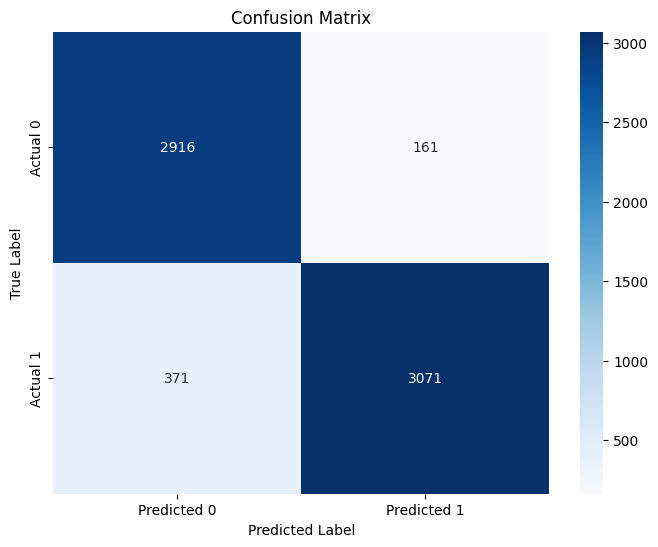

In [47]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

print(f"Accuracy: {accuracy:.4f}")
print(f"Precision: {precision:.4f}")
print(f"Recall: {recall:.4f}")
print(f"F1-score: {f1:.4f}")

conf_matrix = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues',
            xticklabels=['Predicted 0', 'Predicted 1'], yticklabels=['Actual 0', 'Actual 1'])
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix')
plt.show()


## Save Trained Model

### Subtask:
Save the trained Logistic Regression model to a .pkl file for future use.


**Method**:
The first instruction is to import the `joblib` library, which is necessary for saving Python objects, including machine learning models, to disk.



In [48]:
import joblib

print("joblib imported successfully.")

joblib imported successfully.


**Method**:
The next step is to save the trained `model` object to a file named 'logistic_regression_model.pkl' using `joblib.dump()`, as specified in the subtask.



In [49]:
joblib.dump(model, 'logistic_regression_model.pkl')
print("Logistic Regression model saved as 'logistic_regression_model.pkl'.")

Logistic Regression model saved as 'logistic_regression_model.pkl'.


## Final Task

### Subtask:
Summarize the training process, model performance, and insights, especially concerning procrastination features.


## Summary:

### Q&A

**1. Summarize the training process:**
The training process involved several stages. First, assessment features were aggregated, including `mean_score`, `total_submitted_assessments`, `avg_days_late`, and `avg_days_early` for each student, module, and presentation. Procrastination features, specifically `total_late_submissions`, were also calculated and integrated. Virtual Learning Environment (VLE) data was processed to derive `total_vle_clicks` and `num_vle_interactions`. The combined student data then underwent extensive preprocessing, including handling missing values (imputing 0 for numerical `NaN`s and `date_unregistration` '?' values) and one-hot encoding categorical features. The dataset was split into 80% training and 20% testing sets, stratified by the target variable. Numerical features were scaled using `StandardScaler`. Finally, a Logistic Regression model was trained on this preprocessed and scaled training data.

**2. Summarize model performance:**
The Logistic Regression model demonstrated strong performance on the test set. It achieved an accuracy of 0.9184, a precision of 0.9502, a recall of 0.8922, and an F1-score of 0.9203. A confusion matrix was also generated, visually confirming the classification performance.

**3. Summarize insights, especially concerning procrastination features:**
The analysis successfully incorporated procrastination features (`avg_days_late`, `avg_days_early`, `total_late_submissions`) into the student dataset. These features, alongside other assessment and VLE interaction data, contributed to a model capable of predicting student risk with high accuracy. While the direct impact of individual procrastination features on the model's predictions isn't explicitly quantified here (e.g., through feature importance), their inclusion in a well-performing model suggests they are valuable indicators of student behavior and potential risk.

### Data Analysis Key Findings

*   **Assessment Features Aggregation**: New features such as `mean_score`, `total_submitted_assessments`, `avg_days_late`, and `avg_days_early` were successfully calculated for each student-module-presentation combination.
*   **Procrastination Feature Creation**: A specific procrastination feature, `total_late_submissions` (sum of late submissions for each student in a module/presentation), was created and added to the dataset.
*   **VLE Activity Integration**: `total_vle_clicks` and `num_vle_interactions` were aggregated from VLE data and merged into the main student DataFrame, providing insights into student engagement.
*   **Comprehensive Data Preprocessing**:
    *   Missing values in `date_unregistration` were replaced with 0 after converting '?' to `NaN`.
    *   `NaN` values in aggregated numerical columns (e.g., `mean_score`, `total_late_submissions`, `total_vle_clicks`) were imputed with 0.
    *   All identified categorical features were one-hot encoded (`drop_first=True`) to prepare the data for modeling.
*   **Data Preparation for Modeling**: The preprocessed data was split into training and testing sets (80/20 ratio), stratified to maintain class distribution, and numerical features were scaled using `StandardScaler`.
*   **Logistic Regression Model Performance**: The trained Logistic Regression model achieved high evaluation metrics on the test set:
    *   Accuracy: 0.9184
    *   Precision: 0.9502
    *   Recall: 0.8922
    *   F1-score: 0.9203
*   **Model Persistency**: The trained model was successfully saved as `logistic_regression_model.pkl` for future deployment or analysis.

### Insights or Next Steps

*   The model's strong performance (F1-score of 0.9203) suggests that the selected features, including those related to procrastination and VLE engagement, are effective in identifying students at risk. Further analysis could involve examining feature importances to precisely understand which procrastination-related features contribute most significantly to the predictions.
*   Given the model's good performance, the next step could be to deploy this model for real-time student monitoring. Additionally, exploring other classification algorithms (e.g., Random Forest, Gradient Boosting) could potentially yield even better performance or provide different insights into feature importance.
